In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv (r'key_search_terms.csv')

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/cynthiachen/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [39]:
phrases = list(df['normalized_term'])

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from nltk.corpus import stopwords

In [10]:
count_vect = CountVectorizer(stop_words=stopwords.words('english'), lowercase=True)
x_counts = count_vect.fit_transform(phrases)
x_counts.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [18]:
tfidf_transformer = TfidfTransformer()
x_tfidf = tfidf_transformer.fit_transform(x_counts)

In [32]:
dimension = 30
lda = LDA(n_components = dimension)
lda_array = lda.fit_transform(x_tfidf)
lda_array

array([[0.0122257 , 0.0122257 , 0.0122257 , ..., 0.0122257 , 0.0122257 ,
        0.64545465],
       [0.01237378, 0.01237378, 0.01237378, ..., 0.49485508, 0.01237378,
        0.01237378],
       [0.01391982, 0.01391982, 0.01391982, ..., 0.01391982, 0.01391982,
        0.01391982],
       ...,
       [0.00967089, 0.00967089, 0.00967089, ..., 0.00967089, 0.00967089,
        0.00967089],
       [0.01032115, 0.01032115, 0.01032115, ..., 0.01032115, 0.01032115,
        0.01032115],
       [0.01033588, 0.01033588, 0.01033588, ..., 0.01033588, 0.01033588,
        0.01033588]])

In [33]:
components = [lda.components_[i] for i in range(len(lda.components_))]
features = count_vect.get_feature_names()
important_words = [sorted(features, key = lambda x: components[j][features.index(x)], reverse = True)[:3] for j in range(len(components))]

In [34]:
important_words

[['america', 'bank', 'teller'],
 ['business', 'analysis', 'introduction'],
 ['poker', 'tattoo', 'card'],
 ['social', 'responsibility', 'manhattan'],
 ['playing', 'design', 'card'],
 ['visualization', 'automatic', 'molly'],
 ['food', 'asian', 'best'],
 ['ethics', 'business', 'dictionary'],
 ['cafe', 'knowledge', 'obsidian'],
 ['restaurants', 'data', 'airbnb'],
 ['jade', 'card', 'alo'],
 ['google', 'chrome', 'history'],
 ['healthy', 'near', 'company'],
 ['bodysuit', 'zara', 'galt'],
 ['francisco', 'mit', 'san'],
 ['seats', 'vivid', 'leap'],
 ['snowpiercer', 'picnic', 'movie'],
 ['credit', 'care', 'social'],
 ['apple', 'watch', 'canvas'],
 ['companies', 'netflix', 'tech'],
 ['top', 'ribbed', 'tank'],
 ['aritzia', 'pant', 'free'],
 ['joker', 'minimalist', 'yayoi'],
 ['open', 'podcasts', 'spotify'],
 ['princess', 'polly', 'minimalistic'],
 ['service', 'customer', 'women'],
 ['earrings', 'porcelain', 'bakery'],
 ['network', 'graph', 'visualization'],
 ['america', 'bank', 'graph'],
 ['sushi',

In [35]:
# #Dependencies
# import pandas as pd
# import gensim #the library for Topic modelling
# from gensim.models.ldamulticore import LdaMulticore
# from gensim import corpora, models
# import pyLDAvis.gensim #LDA visualization library

# from nltk.corpus import stopwords
# import string
# from nltk.stem.wordnet import WordNetLemmatizer

# import warnings
# warnings.simplefilter('ignore')
# from itertools import chain

### LDA

In [67]:
# Hack Lodge
import csv
import numpy as np
import pandas as pd
import nltk

# imports for NLP
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from dateutil import parser
import string

# from platform import python_version

# print(python_version())
# NLP functions for cleaning text

def remove_punctuation(input):
    return input.translate(str.maketrans('','', string.punctuation))

def remove_whitespaces(input):
    return " ".join(input.split())

def tokenize(input):
    return word_tokenize(input)

def remove_stop_words(input):
    input = word_tokenize(input)
    return [word for word in input if word not in stopwords.words('english')]

def lemmatize(input):
    lemmatizer=WordNetLemmatizer()
    input_str=word_tokenize(input)
    new_words = []
    for word in input_str:
        new_words.append(lemmatizer.lemmatize(word))
    return ' '.join(new_words)

# pipeline for cleaning
def nlp_pipeline(text):
    return lemmatize(' '.join(remove_stop_words(remove_whitespaces(remove_punctuation(text)))))

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

# Step 1: define dictionary of umbrella topics 
# initialize global dict
UMBRELLA_TOPICS = {}

# question: do we care about
def find_topics(question_body):
    try:
        text = nlp_pipeline(question_body)
        # print("cleaned text: ", text)
        count_vectorizer = CountVectorizer(stop_words='english')
        count_data = count_vectorizer.fit_transform([text])
    
        number_of_tags = 2
        # Create and fit the LDA model
        # parameter defn: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html 
        lda = LDA(n_components=1, n_jobs=-1)
        # fit data
        lda.fit(count_data)

        words = count_vectorizer.get_feature_names()
#         print("feature names: --- ", words)
        # Get topics from model
        topics = [[words[i] for i in topic.argsort()[:-number_of_tags - 1:-1]] for (topic_idx, topic) in enumerate(lda.components_)]
#         topics = [[words[i] for i in topic.argsort()] for (topic_idx, topic) in enumerate(lda.components_)]

        topics = np.array(topics).ravel()
        print("SUCCESS")
        print(topics)

    except Exception as e:
        print("FAIL")
        print(e)


# In[100]:


# trial

sentence ="A rainbow is a multicolored arc made by light striking water droplets."
print(find_topics(sentence)) 
# ['water' 'striking' 'rainbow']

# print(find_topics("A rainbow is a meteorological phenomenon that is caused by reflection, refraction and dispersion of light in water droplets resulting in a spectrum of light appearing in the sky."))
# ['water' 'striking' 'rainbow']


# In[8]:


# load key_search_terms
with open('key_search_terms.csv', 'r') as csvfile:
    datareader = csv.reader(csvfile)
    for row in datareader:
        # prints normalized term
        print(row[3])
        print(find_topics(row[3]))

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/cynthiachen/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/cynthiachen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/cynthiachen/nltk_data...


FAIL

**********************************************************************
  Resource omw-1.4 not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('omw-1.4')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load corpora/omw-1.4

  Searched in:
    - '/Users/cynthiachen/nltk_data'
    - '/Users/cynthiachen/opt/anaconda3/nltk_data'
    - '/Users/cynthiachen/opt/anaconda3/share/nltk_data'
    - '/Users/cynthiachen/opt/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************

None
normalized_term
FAIL

**********************************************************************
  Resource omw-1.4 not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('omw-1.4')
  
  For more information see: https://w

FAIL

**********************************************************************
  Resource omw-1.4 not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('omw-1.4')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load corpora/omw-1.4

  Searched in:
    - '/Users/cynthiachen/nltk_data'
    - '/Users/cynthiachen/opt/anaconda3/nltk_data'
    - '/Users/cynthiachen/opt/anaconda3/share/nltk_data'
    - '/Users/cynthiachen/opt/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************

None
best coffee work cafes in san francisco]
FAIL

**********************************************************************
  Resource omw-1.4 not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('omw-1.4')
  
  For more i

FAIL

**********************************************************************
  Resource omw-1.4 not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('omw-1.4')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load corpora/omw-1.4

  Searched in:
    - '/Users/cynthiachen/nltk_data'
    - '/Users/cynthiachen/opt/anaconda3/nltk_data'
    - '/Users/cynthiachen/opt/anaconda3/share/nltk_data'
    - '/Users/cynthiachen/opt/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************

None
does yoru ssn have to match your address
FAIL

**********************************************************************
  Resource omw-1.4 not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('omw-1.4')
  
  For more i

FAIL

**********************************************************************
  Resource omw-1.4 not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('omw-1.4')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load corpora/omw-1.4

  Searched in:
    - '/Users/cynthiachen/nltk_data'
    - '/Users/cynthiachen/opt/anaconda3/nltk_data'
    - '/Users/cynthiachen/opt/anaconda3/share/nltk_data'
    - '/Users/cynthiachen/opt/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************

None
shoulder shrug long sleeve top
FAIL

**********************************************************************
  Resource omw-1.4 not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('omw-1.4')
  
  For more information

FAIL

**********************************************************************
  Resource omw-1.4 not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('omw-1.4')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load corpora/omw-1.4

  Searched in:
    - '/Users/cynthiachen/nltk_data'
    - '/Users/cynthiachen/opt/anaconda3/nltk_data'
    - '/Users/cynthiachen/opt/anaconda3/share/nltk_data'
    - '/Users/cynthiachen/opt/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************

None
what is a day pass caltrain
FAIL

**********************************************************************
  Resource omw-1.4 not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('omw-1.4')
  
  For more information se

FAIL

**********************************************************************
  Resource omw-1.4 not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('omw-1.4')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load corpora/omw-1.4

  Searched in:
    - '/Users/cynthiachen/nltk_data'
    - '/Users/cynthiachen/opt/anaconda3/nltk_data'
    - '/Users/cynthiachen/opt/anaconda3/share/nltk_data'
    - '/Users/cynthiachen/opt/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************

None
bank of america san jose
FAIL

**********************************************************************
  Resource omw-1.4 not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('omw-1.4')
  
  For more information see: 

FAIL

**********************************************************************
  Resource omw-1.4 not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('omw-1.4')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load corpora/omw-1.4

  Searched in:
    - '/Users/cynthiachen/nltk_data'
    - '/Users/cynthiachen/opt/anaconda3/nltk_data'
    - '/Users/cynthiachen/opt/anaconda3/share/nltk_data'
    - '/Users/cynthiachen/opt/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************

None
target customer service chat
FAIL

**********************************************************************
  Resource omw-1.4 not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('omw-1.4')
  
  For more information s

FAIL

**********************************************************************
  Resource omw-1.4 not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('omw-1.4')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load corpora/omw-1.4

  Searched in:
    - '/Users/cynthiachen/nltk_data'
    - '/Users/cynthiachen/opt/anaconda3/nltk_data'
    - '/Users/cynthiachen/opt/anaconda3/share/nltk_data'
    - '/Users/cynthiachen/opt/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************

None
minimalistic poker card design
FAIL

**********************************************************************
  Resource omw-1.4 not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('omw-1.4')
  
  For more information

FAIL

**********************************************************************
  Resource omw-1.4 not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('omw-1.4')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load corpora/omw-1.4

  Searched in:
    - '/Users/cynthiachen/nltk_data'
    - '/Users/cynthiachen/opt/anaconda3/nltk_data'
    - '/Users/cynthiachen/opt/anaconda3/share/nltk_data'
    - '/Users/cynthiachen/opt/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************

None
analyzing database in class activity
FAIL

**********************************************************************
  Resource omw-1.4 not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('omw-1.4')
  
  For more infor

FAIL

**********************************************************************
  Resource omw-1.4 not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('omw-1.4')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load corpora/omw-1.4

  Searched in:
    - '/Users/cynthiachen/nltk_data'
    - '/Users/cynthiachen/opt/anaconda3/nltk_data'
    - '/Users/cynthiachen/opt/anaconda3/share/nltk_data'
    - '/Users/cynthiachen/opt/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************

None
introduction to linear programming
FAIL

**********************************************************************
  Resource omw-1.4 not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('omw-1.4')
  
  For more informa

FAIL

**********************************************************************
  Resource omw-1.4 not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('omw-1.4')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load corpora/omw-1.4

  Searched in:
    - '/Users/cynthiachen/nltk_data'
    - '/Users/cynthiachen/opt/anaconda3/nltk_data'
    - '/Users/cynthiachen/opt/anaconda3/share/nltk_data'
    - '/Users/cynthiachen/opt/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************

None
ideas for github tooling
FAIL

**********************************************************************
  Resource omw-1.4 not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('omw-1.4')
  
  For more information see: 

FAIL

**********************************************************************
  Resource omw-1.4 not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('omw-1.4')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load corpora/omw-1.4

  Searched in:
    - '/Users/cynthiachen/nltk_data'
    - '/Users/cynthiachen/opt/anaconda3/nltk_data'
    - '/Users/cynthiachen/opt/anaconda3/share/nltk_data'
    - '/Users/cynthiachen/opt/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************

None
sushi
FAIL

**********************************************************************
  Resource omw-1.4 not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('omw-1.4')
  
  For more information see: https://www.nltk.or

FAIL

**********************************************************************
  Resource omw-1.4 not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('omw-1.4')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load corpora/omw-1.4

  Searched in:
    - '/Users/cynthiachen/nltk_data'
    - '/Users/cynthiachen/opt/anaconda3/nltk_data'
    - '/Users/cynthiachen/opt/anaconda3/share/nltk_data'
    - '/Users/cynthiachen/opt/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************

None
yva yoga pircing
FAIL

**********************************************************************
  Resource omw-1.4 not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('omw-1.4')
  
  For more information see: https://

### word frequency

In [51]:
words = []
for word in phrases:
    separated = word.split(' ')
    for s in separated:
        words.append(s)

word_freq = {}
for w in words:
    if w not in word_freq.keys():
        word_freq[w] = 1
    else:
        word_freq[w] += 1

In [66]:
sorted_dict = dict( sorted(word_freq.items(),
                           key=lambda item: item[1],
                           reverse=True))
print('Sorted Dictionary: ')
print(sorted_dict)

Sorted Dictionary: 
{'to': 102, 'of': 70, 'how': 65, 'card': 56, 'in': 53, 'bank': 43, 'is': 38, 'america': 38, 'san': 36, 'the': 34, 'business': 34, 'what': 33, 'for': 33, 'food': 32, 'a': 32, 'google': 27, 'best': 27, 'harvard': 27, 'visualization': 27, 'and': 23, 'graph': 23, 'your': 22, 'does': 22, 'near': 21, 'poker': 21, 'design': 21, 'chrome': 20, 'me': 19, 'you': 19, 'check': 18, 'consulting': 18, 'on': 17, 'top': 17, 'polly': 17, 'playing': 17, '2022': 16, 'can': 16, 'asian': 16, 'minimalistic': 16, 'sushi': 15, 'history': 15, 'restaurants': 14, 'francisco': 14, 'princess': 14, 'do': 14, 'tech': 14, 'python': 14, 'market': 13, 'sf': 13, 'credit': 13, 'get': 13, 'set': 13, 'node': 13, 'jose': 12, 'data': 12, 'vintage': 11, 'fall': 11, 'bodysuit': 11, 'quantitative': 11, 'social': 11, 'analysis': 11, 'target': 10, 'companies': 10, 'ideas': 10, 'time': 9, 'aritzia': 9, 'company': 9, 'account': 9, 'pant': 9, 'free': 9, 'mit': 9, 'tattoo': 9, 'minimalist': 9, 'journey': 9, 'movie':

In [65]:
sorted_freq

{'李': 1,
 'zuoheng.qin.work@gmail.com': 1,
 'zucchini': 3,
 'zoom': 2,
 'zone': 5,
 'zara': 5,
 'yva': 1,
 'yu': 1,
 'youtue': 1,
 'youtube': 2,
 'your': 22,
 'you': 19,
 'yoru': 1,
 'york': 2,
 'yojur': 1,
 'yoiur': 1,
 'yoga': 1,
 'yeo': 2,
 'yearly': 2,
 'yayoi': 3,
 'y0u': 1,
 'x': 2,
 'write': 2,
 'workspace': 1,
 'workflow': 1,
 'work': 8,
 'words': 1,
 'word': 5,
 'womens': 2,
 'women': 3,
 'withholding': 1,
 'withdrawals': 1,
 'withdrawal': 2,
 'with': 7,
 'wine': 1,
 'will': 1,
 'wilfred': 1,
 'wiley': 1,
 'widlred': 1,
 'wide': 2,
 'why': 5,
 'whole': 1,
 'who': 3,
 'white': 2,
 'where': 2,
 'when': 3,
 'what': 33,
 'whale': 3,
 'westover': 3,
 'wellness': 1,
 'weird': 1,
 'web': 4,
 'wear': 1,
 'watershed': 2,
 'watches': 1,
 'watch': 3,
 'walmart': 1,
 'walgreens': 1,
 'waiver': 1,
 'waive': 1,
 'waist': 1,
 'waffleknit': 1,
 'waffleknigt': 1,
 'waffle': 5,
 'wafffleknit': 1,
 'vsl': 1,
 'vs': 2,
 'vr': 1,
 'vlog': 2,
 'vivid': 5,
 'visualization': 27,
 'visual': 1,
 'visit

(array([128., 128., 127., 128., 127., 128., 128., 127., 128., 128.]),
 array([   0. ,  127.6,  255.2,  382.8,  510.4,  638. ,  765.6,  893.2,
        1020.8, 1148.4, 1276. ]),
 <BarContainer object of 10 artists>)

/Users/cynthiachen/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26446 (\N{CJK UNIFIED IDEOGRAPH-674E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


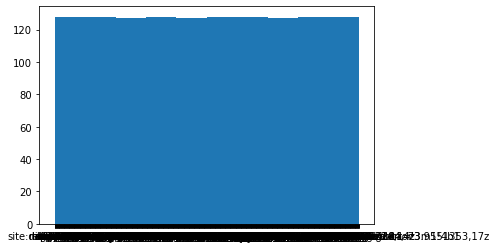

In [54]:
plt.hist(word_freq)

## Gensim stuff

In [37]:
from gensim import corpora, models, similarities, downloader

# Stream a training corpus directly from S3.
corpus = corpora.MmCorpus(words)

AttributeError: 'list' object has no attribute 'seek'

In [ ]:
# Train Latent Semantic Indexing with 200D vectors.
lsi = models.LsiModel(corpus, num_topics=200)

# Convert another corpus to the LSI space and index it.
index = similarities.MatrixSimilarity(lsi[another_corpus])

# Compute similarity of a query vs indexed documents.
sims = index[query]